## EAS 503 Homework 2 Submission
Name - Abhishek Kumar, UB#50291056

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 16, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (15 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

Consider the following attributes of the cards:

- A primary account is the main account to which multiple sup-cards are linked. 

- The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. 

- There are two types of credit limits:

    1. Individual card limit (limiting the expenditure per card)

    2. Account limit (limiting the total expenditure on primiary and the related sup-cards)

$$Account\ Limit >= Individual\ Card\ Limit$$

- There are two types of expenditure (or balances):

    1. Individual card expenditure (different for each card irrespective of primary or otherwise)

    2. Account expenditure (total spending on primary and all the related sup-cards)

$$Account\ expenditure = \Sigma(Individual\ card\ expenditure )$$ 


- Each sup-card has the same account limit as the primary credit card in that account. The account limit is the max of all card limts in that account. 

- Any transaction over the permitted limits must be denied i.e. transactions cannot lead to account expenditures being more than account limits. Also, transactions cannot lead to individual card expenditures being more than individual card limit.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

Example:
Suppose you have an account with 5 cards in it (1 primary and 4 sup-cards). 

Primary card limit= $100

Each sup-card limit=$30

Restrictions:

- Account limit is $100 (max of 100 and 30)

- Primary card cannot spend more than $100

- All cards together cannot spend more than $100

- Any sup-card cannot spend more than $30

In [201]:
# Enter your solution here
class PrimaryCard(object):
    def __init__(self, pc_id, pc_num, a_num, pc_limit, pc_balance, a_limit):
        self.__primarycustomer_id = int(pc_id)
        self.__primarycard_number = int(pc_num)
        self.account_num = int(a_num)
        self.card_type = "P"
        self.__primarycard_limit = float(pc_limit)
        self.__primarycard_balance = float(pc_balance)
        self.account_limit = float(a_limit)

    def getCustomerId(self):
        return self.__primarycustomer_id

    def getCardNumber(self):
        return self.__primarycard_number

    def getAccountNumber(self):
        return self.account_num

    def getCardType(self):
        return self.card_type

    def getCardLimit(self):
        return self.__primarycard_limit

    def getCardBalance(self):
        return self.__pc_balance


    def updateCardBalance(self, transaction_amount=0):
        result = False
        new_bal = self.__primarycard_balance + transaction_amount
        if ((self.__primarycard_limit > new_bal) or (self.account_limit > new_bal)):
            self.__primarycard_balance = new_bal
            result = True
        else:
            print("Card/Account Limit Exceeded")
        return result

class SupplementaryCard(PrimaryCard):
    def __init__(self, sc_id, sc_num, anum, sc_limit, sc_balance, a_limit, pc_id, pc_num, pc_limit, pc_balance):
        super().__init__( pc_id, pc_num, anum, pc_limit, pc_balance, a_limit)
        self.supplecustomer_id = int(sc_id)
        self.supplecard_num = int(sc_num)
        self.supplecard_type = "S"
        self.supplecard_limit = float(sc_limit)
        self.supplecard_balance = float(sc_balance)

    def getCustomerId(self):
        return self.supplecustomer_id

    def getCardBalance(self):
        return self.supplecard_balance

    def updateCardBalance(self, transaction_amount=0):
        result = False
        new_bal = self.supplecard_balance + transaction_amount
        if ((self.supplecard_limit > new_bal) or (self.account_limit > new_bal)):
            self.supplecard_balance = new_bal
            result = True
        else:
            print("======Card/Account Limit Exceeded========")
        return result


In [211]:

import pandas as pd
import datetime
import numpy as np

data = pd.read_csv("Account_details.txt", sep='\t')
unique_acc = data['Account_Number'].unique().tolist()
account = {}  # to store primarycard and secondary card object with customer_ID as key
account_balance = {}

for acc in unique_acc:
    temp_df = data[data['Account_Number'] == acc]

    # primary card instance creation
    p_acc = temp_df[temp_df['Primary_or_Sup_card_indicator'] == 'P']
    pc_id = int(p_acc['Customer_ID'])
    pc_num = int(p_acc['Card_number'])
    a_num = int(p_acc['Account_Number'])
    pc_limit = float(p_acc['Card_Limit'])
    pc_balance = float(p_acc['Current_Balance_within_card'])
    a_limit = float(temp_df['Card_Limit'].max())
    p_obj = PrimaryCard(pc_id, pc_num, a_num, pc_limit, pc_balance, a_limit)
    account[pc_id] = p_obj

    a_bal = pc_balance

    # secondary card instance creation
    s_acc = temp_df[temp_df['Primary_or_Sup_card_indicator'] == 'S']
    if len(s_acc) > 0:
        for i in range(len(s_acc)):
            sc_id = s_acc.iloc[i]['Customer_ID']
            sc_num = s_acc.iloc[i]['Card_number']
            sc_limit = s_acc.iloc[i]['Card_Limit']
            sc_balance = s_acc.iloc[i]['Current_Balance_within_card']
            s_obj = SupplementaryCard(sc_id, sc_num, a_num, sc_limit, sc_balance, a_limit, pc_id, pc_num,
                                      pc_limit, pc_balance)
            account[sc_id] = s_obj
            a_bal = a_bal + sc_balance
    date_balance = np.full((31),a_bal)
    account_balance[a_num] = date_balance, a_bal

# updating transaction data
tdf = pd.read_csv("transaction.txt", sep='\t')
tdf = tdf.merge(data, on='Customer_ID')[['Customer_ID', 'Transaction_amount', 'Date', 'Account_Number']]
for i in range(len(tdf)):
    cus_id = int(tdf.iloc[i]['Customer_ID'])
    t_amount = tdf.iloc[i]['Transaction_amount']
    t_date = tdf.iloc[i]['Date']
    datee = datetime.datetime.strptime(t_date, "%m/%d/%Y")
    customer_obj = account[cus_id]

    acc = int(tdf.iloc[i]['Account_Number'])
    date_balance, a_bal = account_balance[acc]
    new_a_bal = a_bal + t_amount
    if ( new_a_bal < customer_obj.account_limit):
        success = customer_obj.updateCardBalance(t_amount)
        if success:
            date_balance[datee.day - 1:] = date_balance[datee.day - 1:] + t_amount
            account_balance[acc] = date_balance, new_a_bal

        account[cus_id] = customer_obj
    else:
        print("=======Account Limit Exceeded=======")


=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======
=======Account Limit Exceeded=======


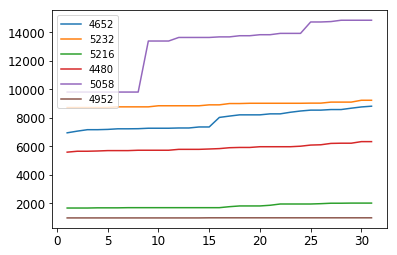

In [212]:
import matplotlib.pyplot as plt
x = np.arange(1,32)
for bal in account_balance:
    date_balance , _ = account_balance[bal]
    plt.plot(x, date_balance)
plt.legend(account_balance.keys())


### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$7x^4 + 2x^2 + 5 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^5 -3x^3 +9x^2+5x+6=0$
2. $x^3 -8x +5=0$
3. $x^2+9x+7=0$
3. Consider the following three polynomials: $f(x)=3x-1,$ $g(x)=x^2-2$ and $p(x)=8x^2 +4$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [193]:
#Enter your solution here
import numpy as np
import operator
import pandas as pd
import matplotlib.pyplot as plt

class PolyTerm:
    #Input = list of tuples;[(coefficient, degree)];
    #example: [(2,3)]
    def __init__(self, coef=[]):    
        self.coef = coef

    def __mul__(self, other):
        p = Poly([])
        for i in other.coef:
            temp = []
            temp.append((i[0] * self.coef[0][0], i[1] + self.coef[0][1]))
            p = p.__add__(Poly(temp))
        return p

    def __add__(self, other):
        listt = []
        i = 0
        j = 0
        if (len(self.coef) == 0):
            listt = other.coef

        elif (len(other.coef) == 0):
            listt = self.coef
        while (i < len(self.coef)):
            while (j < len(other.coef)):
                if (i == (len(self.coef)) and j <= (len(other.coef))):
                    for k in range(j, len(other.coef)):
                        listt.append(other.coef[k])
                        j = j + 1
                    break
                elif (i <= (len(self.coef)) and j == (len(other.coef))):
                    for k in range(i, len(other.coef)):
                        listt.append(other.coef[k])
                        i = i + 1
                    break
                if (self.coef[i][1] > other.coef[j][1]):
                    listt.append(self.coef[i])
                    i = i + 1
                elif (self.coef[i][1] == other.coef[j][1]):
                    listt.append((self.coef[i][0] + other.coef[j][0], self.coef[i][1]))
                    i = i + 1
                    j = j + 1
                elif (self.coef[i][1] < other.coef[j][1]):
                    listt.append(other.coef[j])
                    j = j + 1
        return Poly(listt)


            


class Poly:
    #Input = list of tuples;[(coefficient, degree)];
    #example: [(2,3), (5,2), (1,1), (3,0)]
    def __init__(self, coef=[]):
        coef.sort(key = operator.itemgetter(1), reverse = True)   #sorting the list of tuples
        self.coef = coef
        
    def __del__(self):
        pass

    def __sub__(self, other):
        other.coef = list(map(lambda x: np.multiply(x,(-1,1)).tolist(), other.coef))
        return self.__add__(other)
    
    def __add__(self, other):
        listt = []
        i = 0
        j = 0
        if (len(self.coef) == 0):
            listt = other.coef

        elif (len(other.coef) == 0):
            listt = self.coef
        while (i < len(self.coef)):
            while (j < len(other.coef)):
                if (i == (len(self.coef)) and j <= (len(other.coef))):
                    for k in range(j, len(other.coef)):
                        listt.append(other.coef[k])
                        j = j + 1
                    break
                elif (i <= (len(self.coef)) and j == (len(other.coef))):
                    for k in range(i, len(other.coef)):
                        listt.append(other.coef[k])
                        i = i + 1
                    break
                if (self.coef[i][1] > other.coef[j][1]):
                    listt.append(self.coef[i])
                    i = i + 1
                elif (self.coef[i][1] == other.coef[j][1]):
                    listt.append((self.coef[i][0] + other.coef[j][0], self.coef[i][1]))
                    i = i + 1
                    j = j + 1
                elif (self.coef[i][1] < other.coef[j][1]):
                    listt.append(other.coef[j])
                    j = j + 1
        return Poly(listt)

    def __mul__(self, other):
        p = Poly([])
        for i in other.coef:
            temp = []
            for j in self.coef:
                temp.append((i[0] * j[0], i[1] + j[1]))
            p = p.__add__(Poly(temp))
        return p
    
    def order(self):
        return self.coef[0][1]
    
    def solve(self):
        a = 0 
        b = 0
        c = 0
        roots = []
        if self.order()==2:
            a = self.coef[0][0]
            if len(self.coef) == 3:
                b = self.coef[1][0]
                c = self.coef[2][0]
            elif len(self.coef) == 2:
                b = self.coef[1][0] if self.coef[1][1]==1 else 0
                c = self.coef[1][0] if self.coef[1][1]==0 else 0
            try:
                x1 = (-b+np.sqrt(np.power(b,2)-4*a*c))/(2*a)
                x2 = (-b-np.sqrt(np.power(b,2)-4*a*c))/(2*a)
                roots = [x1, x2]
            except ValueError:
                roots = "Imaginary roots"
        elif self.order()==1:
            b = self.coef[0][0]
            try:
                c = self.coef[1][0]
            except Exception:
                c = 0
            x1 = -c/b
            roots = [x1]
        elif(self.order()>2):
            print("Polynomial of order>2")
        return roots

    
def plotPoly(poly = []):
    x = np.linspace(-10,10, 10000)
    y=[]
    for i in range(len(x)):
        value = 0
        for coef in poly.coef:
            value = value + coef[0]*(np.power(x[i],coef[1]))
        y.append(value)
    df = pd.DataFrame(data = {'x':x,'y':y})
    plt.plot(df['x'],df['y'],'-')

In [194]:
#Solution
#1
poly1 = [(1,5),(-3,3),(9,2),(5,1),(6,0)]
poly2 = [(1,3),(-8,1),(5,0)]
poly3 = [(1,2),(9,1),(7,0)]
a = Poly(poly1)
b = Poly(poly2)
c = Poly(poly3)
print(a.solve())
print(b.solve())
print(c.solve())


Polynomial of order>2
[]
Polynomial of order>2
[]
[-0.859945055359741, -8.140054944640259]


[[-8, 4], [12, 2], (3, 1), (7, 0)]


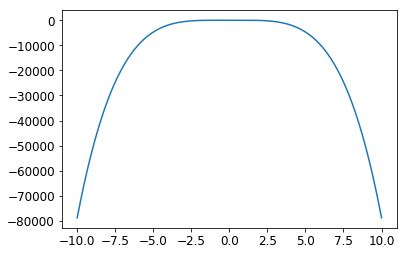

In [207]:
#Part b
fx = Poly([(3,1),(-1,0)])
gx = Poly([(1,2),(-2,0)])
px = Poly([(8,2),(4,0)])

hx = gx*px
ans = fx-hx
print(ans.coef)
plotPoly(ans)

### Problem 3 - Random Walk (10 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a step of random length, say `c`, in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (c,0), (-c,0), (0,c) or (0,-c) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``getLength()`` that determines the length for the next step (one out of six possible lengths: 0,1,2,3,4,5). To determine the length, sample a random value from the set {1,2,3,4,5,6} using `np.random.randint(0,N)` and assign each outcome to a step length.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-20,-20), (-20,20), (20,20), (20,-20). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

In [173]:
#Enter your solution here
import numpy as np
#np.random.seed(1)
class Walker:
    
    def __init__(self):
        self.cur_pos = np.array((0,0))
        self.path = [self.cur_pos]
    
    def getDirection(self):
        dir = np.random.randint(0,4)
        if dir==0:
            step =(1,0)
        elif dir == 1:
            step = (-1,0)
        elif dir == 2:
            step = (0,1)
        else:
            step = (0,-1)
        return step
    
    def getLength(self):
        return np.random.randint(0,6)
    
    def walk(self, direction = (0,0), length = 0):
        self.cur_pos = np.add(self.cur_pos, np.multiply(direction, length)) 
        self.path.append(self.cur_pos)

def checkWalker(boundary = (10,10,10,10)):    #(max_x-axis, min_x-axis, max_y-axis, min_y-axis)
    check = True
    my_walk = Walker()
    p =0
    while(check):
        my_walk.walk(my_walk.getDirection(), my_walk.getLength())
        if my_walk.cur_pos[0] >= 0:
            if boundary[0] < np.absolute(my_walk.cur_pos[0]):
                check = False
                break
        else:
            if boundary[1] < np.absolute(my_walk.cur_pos[0]):
                check = False
                break
        if my_walk.cur_pos[1] >= 0:
            if boundary[2] < np.absolute(my_walk.cur_pos[1]):
                check = False
                break
        else:
            if boundary[3] < np.absolute(my_walk.cur_pos[1]):
                check = False
                break
    return my_walk.path
    

mean number of steps 69


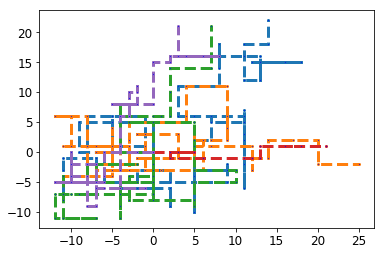

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
num_steps = 0
for i in range (0,5):  
    data=checkWalker(boundary = (20,20,20,20))    #(max_x-axis, min_x-axis, max_y-axis, min_y-axis)
    df = pd.DataFrame(data)
    num_steps = num_steps + len(df) - 1
    plt.plot(df[0], df[1], linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=2)

mean_num_steps = num_steps//5
print("mean number of steps "+ str(mean_num_steps))




### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from a _Kumaraswamy distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is Kumaraswamy distribution. Call this function ``inverseCDFKumaraswamy()``. Note that you are not allowed to use any routines from ``np.random`` package except ``np.random.uniform``here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\alpha$ and $\beta$.
3. Apply the ``inverseCDFKumaraswamy()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

The Probability Density Function (PDF) of the Kumaraswamy distribution is
$$f(x)=\alpha*\beta*x^{\alpha-1}*(1-x^\alpha)^{\beta-1}$$

The Cumulative Distribution Function (CDF) of the Kumaraswamy distribution is
$$F(x)= 1-(1-x^\alpha)^\beta$$

Using the above implementation, generate a sample of size 100 from a Kumaraswamy ($\alpha=2$, $\beta=5$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

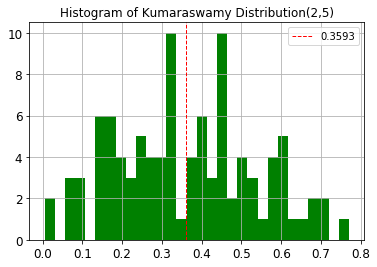

In [175]:
#Enter your solution here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed(1)

def randomSampleSwamy(n=100, alpha = 2, beta= 5):
    klist = [] 
    random_uni_sample = np.random.uniform(low=0.0, high=1.0, size=(100))
    for pt in random_uni_sample:
        klist.append(inverseCDFKumaraswamy(pt, alpha=2, beta=5))   
    return klist
    
def inverseCDFKumaraswamy(point=1,alpha = 1, beta =1):
    return np.power(1-np.power(1-point, 1/beta),1/alpha)



KSDistri = np.array(randomSampleSwamy(100,2,5))
fig = plt.figure()
plt.hist(KSDistri,bins = 30 ,align='mid', color = 'g')
plt.title('Histogram of Kumaraswamy Distribution(2,5)')
plt.grid(True)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.axvline(KSDistri.mean(), color='r', linestyle='dashed', linewidth=1,label=np.around(np.mean(KSDistri), decimals=4))
plt.legend(loc=1)

